In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def wavelength_to_rgb(wavelength, gamma=0.8):
    """
    Convert a wavelength (nm) to an approximate RGB color.
    Valid range: 380 nm – 780 nm (visible spectrum).
    Returns: (R, G, B) tuple with values in [0, 1]
    Based on Dan Bruton's algorithm: http://www.physics.sfasu.edu/astro/color/spectra.html
    """
    wavelength = float(wavelength)
    if 380 <= wavelength <= 440:
        R = -1.0 * (wavelength - 440) / (440 - 380)
        G = 0.0
        B = 1.0
    elif 440 < wavelength <= 490:
        R = 0.0
        G = (wavelength - 440) / (490 - 440)
        B = 1.0
    elif 490 < wavelength <= 510:
        R = 0.0
        G = 1.0
        B = -1.0 * (wavelength - 510) / (510 - 490)
    elif 510 < wavelength <= 580:
        R = (wavelength - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif 580 < wavelength <= 645:
        R = 1.0
        G = -1.0 * (wavelength - 645) / (645 - 580)
        B = 0.0
    elif 645 < wavelength <= 780:
        R = 1.0
        G = 0.0
        B = 0.0
    else:
        R = G = B = 0.0  # Outside visible range

    # Intensity correction (dim edges of visible spectrum)
    if 380 <= wavelength <= 420:
        factor = 0.3 + 0.7 * (wavelength - 380) / (420 - 380)
    elif 420 < wavelength <= 700:
        factor = 1.0
    elif 700 < wavelength <= 780:
        factor = 0.3 + 0.7 * (780 - wavelength) / (780 - 700)
    else:
        factor = 0.0

    R = (R * factor) ** gamma
    G = (G * factor) ** gamma
    B = (B * factor) ** gamma

    return (R, G, B)

In [3]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    sigk=np.sqrt(np.abs((np.average(Y*Y)-np.average(Y)*np.average(Y))/(np.average(X*X)-np.average(X)**2) - k*k))/np.sqrt(X.shape[0])
    sigb=sigk*np.sqrt(np.average(X*X)-np.average(X)**2)
    return np.array([k,b,np.abs(sigk/k),np.abs(sigb/b)])

In [4]:
df,ds,dc=pd.read_excel("data.xlsx",sheet_name=0),pd.read_excel("data.xlsx",sheet_name=1),pd.read_excel("data.xlsx",sheet_name=2)

In [5]:
df

,col,m,deg,min,sec,s
0,NaN,0,217,9,5,781745
1,NaN,0,217,18,52,782332
2,p,1,229,55,4,827704
3,b,1,231,33,35,833615
4,g,1,233,11,1,839461
5,y1,1,234,6,28,842788
6,y2,1,234,10,27,843027
7,p,-1,204,44,51,737091
8,b,-1,203,6,53,731213
9,g,-1,201,29,46,725386


In [6]:
ds

,c,n,deg,min,sec,s,Unnamed: 6
0,y1,0,200,35,18,722118,-70.0
1,y1,1,200,34,8,722048,NaN
2,y2,0,200,31,21,721881,-58.0
3,y2,1,200,30,23,721823,NaN


In [7]:
dc

,c,lb
0,p,404.7
1,b,491.6
2,g,546.1
3,y1,577.0
4,y2,579.1


In [8]:
dc=dc.set_index("c")

In [9]:
z=np.average(df[(df.m==0)].s)
sz=np.sqrt(np.sum((df[(df.m==0)].s-z)**2))/z
z=z/3600
z,sz

(217.23291666666665, 0.0005307560696263718)

In [10]:
dfl=df[df.col.notna()]
z2=np.average(dfl.s)/3600
z2-z

0.1070277777778017

In [11]:
lbs=np.array(dc.loc[dfl.col]).reshape(-1)
fis=np.array(dfl.s/3600)-z2

In [12]:
lbs,fis

(array([404.7, 491.6, 546.1, 577. , 579.1, 404.7, 491.6, 546.1, 577. ,
        579.1]),
 array([ 12.57783333,  14.21977778,  15.84366667,  16.76783333,
         16.83422222, -12.59244444, -14.22522222, -15.84383333,
        -16.75966667, -16.82216667]))

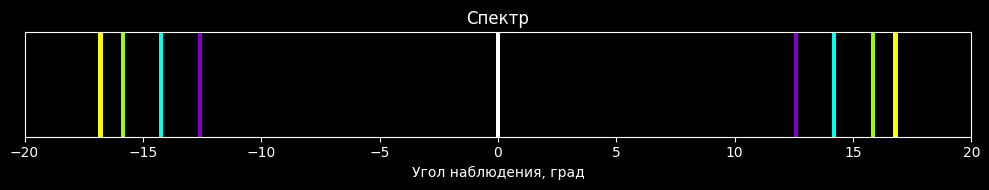

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Generate wavelengths across visible spectrum
wavelengths = lbs
colors = [wavelength_to_rgb(w) for w in wavelengths]
plt.style.use('dark_background')
# Create a figure with colored bars
fig, ax = plt.subplots(figsize=(10, 2))
for i, (w, color) in enumerate(zip(fis, colors)):
    ax.bar(w, 1, width=1/6, color=color, edgecolor='none')
ax.bar(0, 1, width=1/6, color="white", edgecolor='none')

ax.set_xlim(-20, 20)
ax.set_ylim(0, 1)
ax.set_xlabel('Угол наблюдения, град')
ax.set_title('Спектр')
ax.set_yticks([])
plt.tight_layout()
plt.savefig("spec.eps")

In [14]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

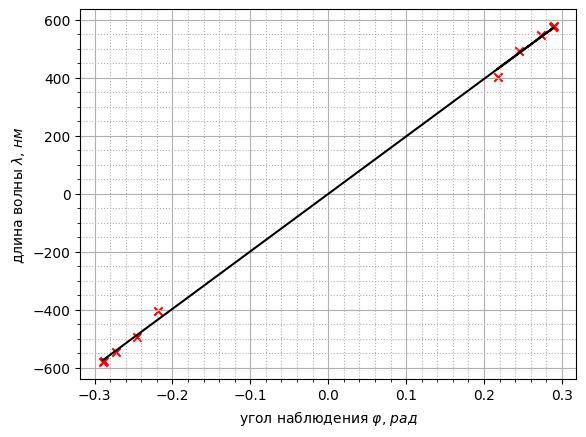

In [28]:
plt.style.use('default')
fig,ax=plt.subplots()
sn=np.sin(fis*np.pi/180)
lbs2=lbs*dfl.m
kf,kb,sk,sb = getkb(sn,lbs2)
ax.scatter(sn,lbs2, color="red", marker="x")
ax.plot(sn,sn*kf+kb, color="black")
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
ax.set_ylabel(r"длина волны $\lambda$, $нм$")
ax.set_xlabel(r"угол наблюдения $\varphi$, $рад$")
fig.savefig("d.eps")

In [29]:
kf,kb

(1981.0290783979729, 0.0011722902512472512)

In [32]:
kf*1e-9,kf*sk

(1.981029078397973e-06, 15.509932192085865)

In [31]:
sk,sb

(0.007829229949834206, 3497.334203163782)

In [36]:
dfp=[]
colors=["y1","y2"]
for m in [-1,1]:
    for c in colors:
        dfp.append(dfl[(dfl.col==c) & (dfl.m==m)].s.iloc[0]*np.pi/(3600*180))
D=np.array([(dfp[0]-dfp[1])/2.1,(dfp[3]-dfp[2])/2.1])
D,np.average(D)

(array([0.00051944, 0.00055176]), 0.0005356036857973564)

In [39]:
5.35*0.04

0.214

In [38]:
10*np.pi/(3600*180)/(dfp[0]-dfp[1])

0.04444444444443816

In [34]:
Dp=1/np.sqrt((kf)**2-578**2)
Dp

0.0005277509862150356

In [35]:
np.sqrt(np.sum((D-np.average(D))**2))/Dp

0.0433051509115332

In [22]:
61*np.pi/(3600*180)/D[0]

0.569333333333253

In [23]:
2*578/0.5693

2030.5638503425257

In [24]:
61*np.pi/(3600*180)*kf

0.7010616116776388

In [25]:
l1=404
l2=578
mn1=0
mn2=0

for i in range(1000):
    for m in range(1000):
        #print(abs(i*l2-(k+m)*l1)/kf)
        if abs(i*l2-m*l1)<0.7:
            print(i,m)

0 0
202 289
404 578
606 867
